<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#Финальные-комментарии-ревьюера" data-toc-modified-id="Финальные-комментарии-ревьюера-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Финальные комментарии ревьюера</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Использум библиотеки:

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем данные:

In [2]:
data = pd.read_csv ('/datasets/insurance.csv')

Изучаем и анализируем данные:

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [6]:
data.duplicated().sum()

153

In [7]:
data = data.drop_duplicates ()

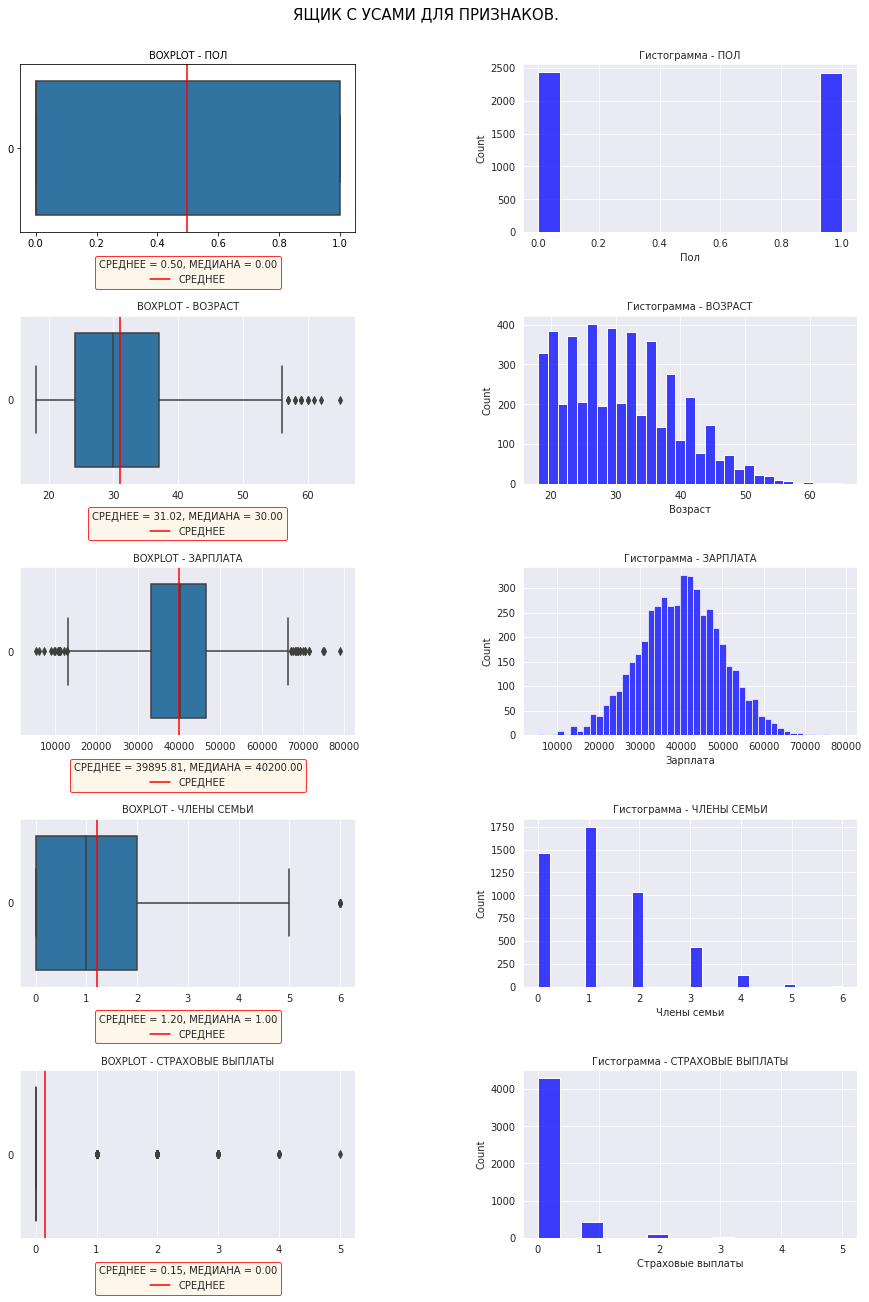

In [8]:
position = 0
num_region = None
plt.figure(figsize=[15, 20])
plt.subplots_adjust(top=0.94, wspace=0.5, hspace=0.5)
plt.suptitle('ЯЩИК С УСАМИ ДЛЯ ПРИЗНАКОВ.', fontsize=15)

for column_name in data.columns:
    position += 1
    plt.subplot(5, 2, position)
    sns.set_style('darkgrid')
    plt.title(f'BOXPLOT - {column_name.upper()}', fontsize=10)
    sns.set_style('darkgrid')
    sns.boxplot(data=data[column_name], orient='h')
    plt.axvline(np.mean(data[column_name]), 
                color='r', 
                linestyle='-',
                label='СРЕДНЕЕ')
    plt.legend(title=f'СРЕДНЕЕ = {np.mean(data[column_name]):.2f}, МЕДИАНА = {np.median(data[column_name]):.2f}', 
               loc='center', 
               edgecolor = 'r',
               facecolor = 'oldlace',
               bbox_to_anchor=(0.5, -0.24))
    position += 1
    plt.subplot(5, 2, position)
    sns.set_style('darkgrid')
    plt.title(f'Гистограмма - {column_name.upper()}', fontsize=10)
    sns.histplot(data[column_name], color='b', label='Сырье', kde=False)
plt.show()

# Вывод:
Типы данных - устраивают.

Пропусков нет.

153 дубликата данных - удалили, можно было и оставить.

Пол - столбец с категориальными данными.

В данных есть выбросы. Значимых нарушений нет.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится, изменится лишь вектор весов линейной регрессии для новых признаков.

**Обоснование:** 

Представим нашу новую матрицу:

$$
X1 = XP
$$

Тогда наша формула обучения примет вид: 

$$
w1 = (X1^T X1)^{-1} X1^T y =((XP)^T XP)^{-1} (XP)^T y
$$

Воспользуемся свойствами матриц и тогда наша формула для расчета вектора весов получит вид:

$$
w1 = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w1 = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w1 = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
w1 =  P^{-1} (X^T X)^{-1} EX^T y
$$
$$
w1 = P^{-1} w
$$

Тоже самое, для формулы предсказаний: 
$
a1 = X1w1
$
подставив получившиеся значения
$
X1 = XP
$
и
$
w1 = P^{-1} w
$
,получим:
$$
a1 = XPP^{-1} w
$$
следует, что
$$
a1 = Xw
$$
Тем самым получаем, что наши предсказания никоем образом не изменятся.

## Алгоритм преобразования

**Алгоритм**

1. Cгенерировать обратимую матрицу - 4х4.

2. Проверка сгенерированной матрицы на обратимость (с помощью np.linalg.inv)

3. Умножить матрицу исходных признаков на сгенерированную матрицу.

4. Посчитать качество модели на полученной матрице и сравнить с качеством модели на матрице исходных данных.

**Обоснование**

Результаты метрики R2 должны оказаться равны - это будет доказывать, что данные защетили правильно.

## Проверка алгоритма

Исходные признаки

In [9]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

Сгенерируем матрицу размером 4х4 методом random.normal ()

In [10]:
matrix_generated = np.random.normal(size=(4, 4))
display (matrix_generated)

array([[ 0.49981436, -2.76638215, -0.1434278 ,  1.38177578],
       [-2.1624337 ,  0.07098127,  0.36765596, -0.2394815 ],
       [-0.04965608,  1.75982226,  0.298787  ,  0.15597676],
       [ 1.73436704, -0.19738815, -0.8462862 ,  0.6011026 ]])

Проверим матрицу на обратимость.

Сделаем из нашей сгенерированной матрицы обратную методом linalg.inv()

Создадим матрицу из наших изначальных признаков, перемножим ее на сгенерированную и обращенную матрицу и составим из полученной новый набор измененных признаков

In [11]:
matrix_invert = np.linalg.inv(matrix_generated)
display (matrix_invert)

array([[ 0.00934935, -0.70479737,  0.00895822, -0.30461009],
       [-0.11807167,  0.14328769,  0.40200089,  0.2241889 ],
       [ 0.42151008, -1.17998245,  0.53326406, -1.57742319],
       [ 0.52769195,  0.41932569,  0.85693754,  0.39528435]])

In [12]:
matrix = features.values
matrix_new = matrix@matrix_invert
features_incode = pd.DataFrame (matrix_new, columns = features.columns)

In [13]:
features_incode

,Пол,Возраст,Зарплата,Члены семьи
0,20902.595963,-58521.540192,26467.245128,-78230.907869
1,16012.479352,-44832.322537,20283.383121,-59931.373296
2,8848.287556,-24775.476105,11210.203210,-33119.385539
3,17575.546124,-49201.420468,22247.267044,-65773.048542
4,10998.116374,-30794.234685,13929.456854,-41164.772614
...,...,...,...,...
4842,15045.659156,-42120.522755,19050.496712,-56306.940071
4843,22083.641333,-61825.789268,27957.561522,-82648.957517
4844,14287.885589,-39997.700647,18087.405404,-53469.371838
4845,13782.374393,-38581.720603,17449.158434,-51575.924957


Создадим класс LinearRegression для последующего обучения наших моделей

In [14]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T@X)@X.T@y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Обучим модель на изначальных признаках и выведем на экран метрику качества R2

In [15]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4302010044852068


Обучим модель на закодированных признаках и выведем на экран метрику качества R2

In [16]:
model = LinearRegression()
model.fit(features_incode, target)
predictions = model.predict(features_incode)
print(r2_score(target, predictions))

0.43020100448498066


Создадим функцию преобразования матрицы признаков.

In [17]:
def cipher_features(features):
    crypted_features = features
    n = features.shape[1]
    np.random.seed(7072020)
    cipher_matrix = np.random.randint(1, 10, (n,n))
    det = np.linalg.det(cipher_matrix)
    while det == 0:
        np.random.seed(7072021)
        cipher_matrix = np.random.randint(1, 10, (n,n))
        det = np.linalg.det(cipher_matrix)
    crypted_features = crypted_features @ cipher_matrix
    return crypted_features, cipher_matrix

In [18]:
display(features.head())
features, cipher_matrix = cipher_features(features)
display(features.head())
cipher_matrix

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


,0,1,2,3
0,397184.0,49981.0,99373.0,248097.0
1,304422.0,38421.0,76185.0,190101.0
2,168261.0,21261.0,42116.0,105058.0
3,333805.0,41903.0,83486.0,208560.0
4,209059.0,26357.0,52320.0,130562.0


array([[7, 5, 8, 6],
       [9, 9, 4, 2],
       [8, 1, 2, 5],
       [8, 7, 1, 9]])

In [19]:
try:
    inv_matrix = np.linalg.inv(cipher_matrix)
    print('\nОбратная матрица к заданной существует')
except:
    print('\nОбратная матрица к заданной не существует')


Обратная матрица к заданной существует


# Вывод:

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
Целевой признак: количество страховых выплат клиенту.

Типы данных - устраивают, пропусков нет, 153 дубликата данных - удалили, можно было и оставить.
В данных есть выбросы. Значимых нарушений нет.

Используемый алгоритм не создает различий в предсказаниях при использовании исходных параметров и модернизированных. Значит, качество предсказаний модели не ухудшится.

Будем считать результаты метрики R2 равным (совпадение до 10 знака после запятой нас вполне устроит) - это доказывать, что данные защетили правильно.